In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings('ignore')

In [39]:
data= pd.read_excel('/Users/parvezshahshaik/Documents/Github/restaurant_recommendation/restaurent_data/data.xlsx')

## Prelimary Data Inspection

In [40]:
data.head(500)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243
5,18352452,Lucky Cat Coffee & Kitchen,94,Jakarta,"Plaza Festival, South Parking, Jl. HR Rasuna S...","Plaza Festival, Kuningan","Plaza Festival, Kuningan, Jakarta",106.831748,-6.218932,"Cafe, Western",300000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,458
6,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,300000,Indonesian Rupiah(IDR),No,No,3,3.7,Yellow,Good,155
7,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",250000,Indonesian Rupiah(IDR),No,No,3,4.0,Green,Very Good,1159
8,18391256,MONKS,94,Jakarta,"Komplek Graha Boulevard Timur, Summarecon Kela...",Kelapa Gading,"Kelapa Gading, Jakarta",106.911335,-6.163948,"Western, Asian, Cafe",250000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,259
9,7422633,Talaga Sampireun,94,Jakarta,Jl. Lingkar Luar Barat,Cengkareng,"Cengkareng, Jakarta",106.728508,-6.168467,"Sunda, Indonesian",200000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,1662


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [42]:
#Removing column heading spaces
data.columns = data.columns.str.replace(' ', '_')

In [43]:
data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


### Checking for the empty values(0) and then suming them up

In [44]:
(data== 0).sum() 

Restaurant_ID              0
Restaurant_Name            0
Country_Code               0
City                       0
Address                    0
Locality                   0
Locality_Verbose           0
Longitude                498
Latitude                 498
Cuisines                   0
Average_Cost_for_two      18
Currency                   0
Has_Table_booking          0
Has_Online_delivery        0
Price_range                0
Aggregate_rating        2148
Rating_color               0
Rating_text                0
Votes                   1094
dtype: int64

### Dealing with missing data in Latitude and Longitude

In [45]:
missing_city = data[(data.Longitude == 0)| (data.Latitude == 0)].City.unique()

len(missing_city)

28

### Filling the Missing Latitude and Longitude

In [46]:
# Calculate the mean Latitude and Longitude for each City, filter for missing cities
lat_n_long = data.groupby('City').agg({"Latitude":"mean", "Longitude":"mean"}).loc[missing_city]

# Create a dictionary with missing city locations
missing_city_loc = {x: tuple(lat_n_long.loc[x]) for x in missing_city}

# Count the number of rows where Latitude or Longitude is 0
missing_coords_count = ((data.Latitude == 0) | (data.Longitude == 0)).sum()

missing_coords_count

499

In [47]:
len(lat_n_long)

28

In essence, this code loops through each row in the DataFrame data. If it encounters a row where either the latitude or longitude value is zero, it replaces those zero values with estimated coordinates retrieved from the missing_city_loc dictionary based on the city associated with that row. This operation aims to update missing or zero coordinates with estimated values for the respective cities in the dataset.

In [48]:
for i in data.index:
    if(data.loc[i,'Latitude'] == 0) or (data.loc[i, 'Longitude'] == 0):
        city = data.loc[i, 'City']
        lat, long = missing_city_loc[city]
        data.loc[i, 'Longitude'] = long
        data.loc[i, 'Latitude'] = lat

### Dealing with duplicates

In [49]:
print('Any Duplicated Rows ? :', data.duplicated().any())
print('No. of Duplicated Rows :', data.duplicated().sum())

Any Duplicated Rows ? : False
No. of Duplicated Rows : 0


In [50]:
data.duplicated('Restaurant_ID').any()

False

In [51]:
print('No. of unique Restaurant_IDs :', data.Restaurant_ID.nunique())
print('No. of unique Restaurant_Names:', data.Restaurant_Name.nunique())

No. of unique Restaurant_IDs : 9551
No. of unique Restaurant_Names: 7445


### Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants

In [52]:
country_code = pd.read_excel('/Users/parvezshahshaik/Documents/Github/restaurant_recommendation/restaurent_data/Country-Code.xlsx')

country_code.columns = country_code.columns.str.replace(' ','_')

country_code

,Country_Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [53]:
data = pd.merge(data, country_code, on = 'Country_Code')

data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


### Finding out the cities with maximun and minimum restaurants

The .value_counts() method in Pandas is used to count the occurrences of unique values in a Series (a single column of a DataFrame). It returns a new Series containing counts of unique values in descending order.


In [60]:
vc = data['Country'].value_counts().reset_index()
vc.columns = ['Country', 'Freq']
vc

,Country,Freq
0,India,8652
1,United States,434
2,United Kingdom,80
3,South Africa,60
4,UAE,60
5,Brazil,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


In [62]:
#Calculating the Perc
vc['Perc'] = (vc['Freq'] / vc['Freq'].sum() * 100).round(1)
vc['Perc']

0     90.6
1      4.5
2      0.8
3      0.6
4      0.6
5      0.6
6      0.4
7      0.4
8      0.3
9      0.2
10     0.2
11     0.2
12     0.2
13     0.2
14     0.0
Name: Perc, dtype: float64

When Seaborn's countplot() function is called with x='Country', it automatically counts the occurrences of each unique country in the 'Country' column and represents those counts on the y-axis of the plot. The resulting plot displays bars corresponding to each country's count, making it a countplot that visualizes the distribution of occurrences of each country in the dataset.

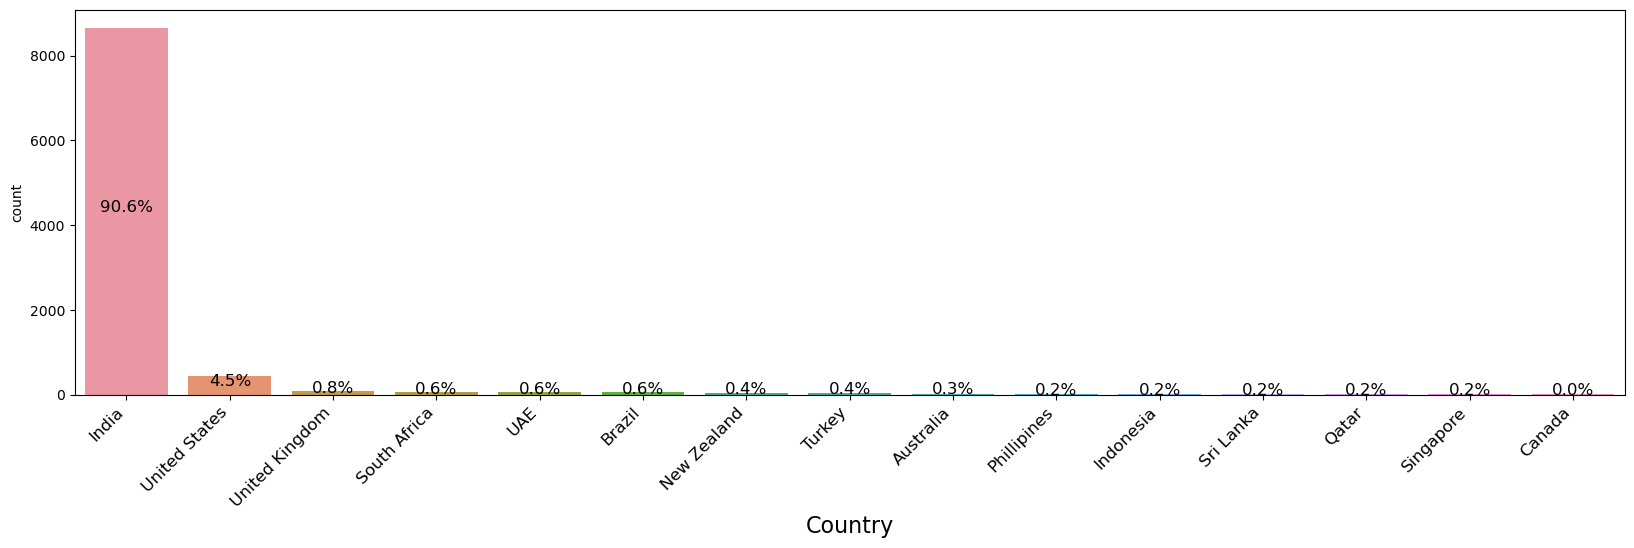

In [64]:
#Plotting the data
plt.figure(figsize = (20,5))

sns.countplot( x='Country', data=data, order=vc['Country'])

for i, row in vc.iterrows():
    plt.annotate(
                  str(row['Perc']) + '%', 
                  xy=(i, row['Freq']/2), 
                  ha='center', 
                  fontsize=12
                 )
plt.xticks(rotation=45, ha='right', size=12)
plt.xlabel('Country',size=16)
plt.show();

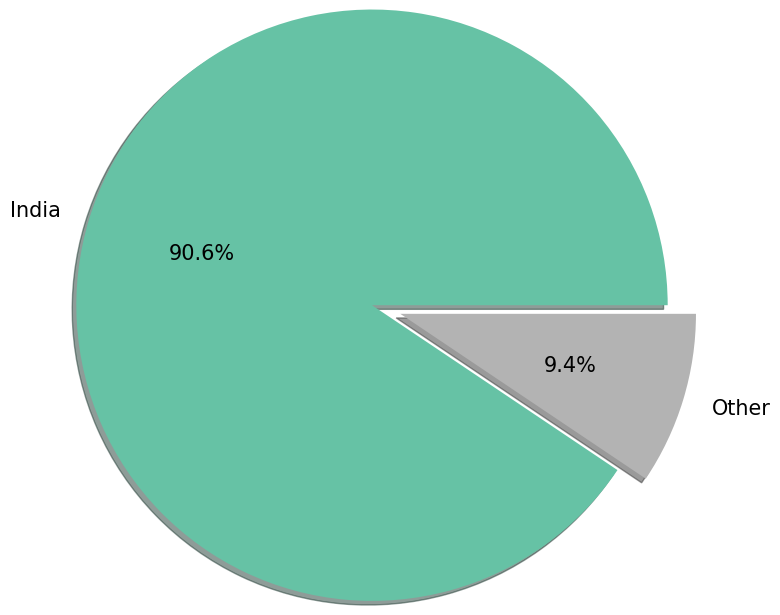

In [77]:
vc = pd.Series()
vc['India'] = len(data[data.Country == 'India'])
vc['Other'] = len(data[data.Country != 'India'])
vc.plot.pie(
    radius = 2,
    autopct = '%1.1f%%',
    textprops = {'size': 15},
    explode = [0.1,0.1],
    shadow = True,
    cmap = 'Set2'
)

plt.xticks(size = 12, rotation = 10)
plt.ylabel('')
plt.show()

India has the largest market of restaurants and no other countries even come close to it

In [81]:
#Displays onlys data from India
data = data[data.Country == 'India']
data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
21,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000,Indian Rupees(Rs.),Yes,No,4,4.0,Green,Very Good,145,India
22,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,Indian Rupees(Rs.),No,No,4,4.1,Green,Very Good,188,India
23,2742,Bukhara - ITC Maurya,1,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500,Indian Rupees(Rs.),No,No,4,4.4,Green,Very Good,2826,India
24,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000,Indian Rupees(Rs.),Yes,No,4,3.2,Orange,Average,12,India
25,2724,1911 - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,Indian Rupees(Rs.),Yes,No,4,3.9,Yellow,Good,272,India


### Exploring how ratings are distributed overall to Restaurants

In [84]:
data['Rating_cat'] = data['Aggregate_rating'].round(0).astype(int)
data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Rating_cat
21,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,8000,Indian Rupees(Rs.),Yes,No,4,4.0,Green,Very Good,145,India,4
22,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",7000,Indian Rupees(Rs.),No,No,4,4.1,Green,Very Good,188,India,4
23,2742,Bukhara - ITC Maurya,1,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,6500,Indian Rupees(Rs.),No,No,4,4.4,Green,Very Good,2826,India,4
24,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",6000,Indian Rupees(Rs.),Yes,No,4,3.2,Orange,Average,12,India,3
25,2724,1911 - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",6000,Indian Rupees(Rs.),Yes,No,4,3.9,Yellow,Good,272,India,4


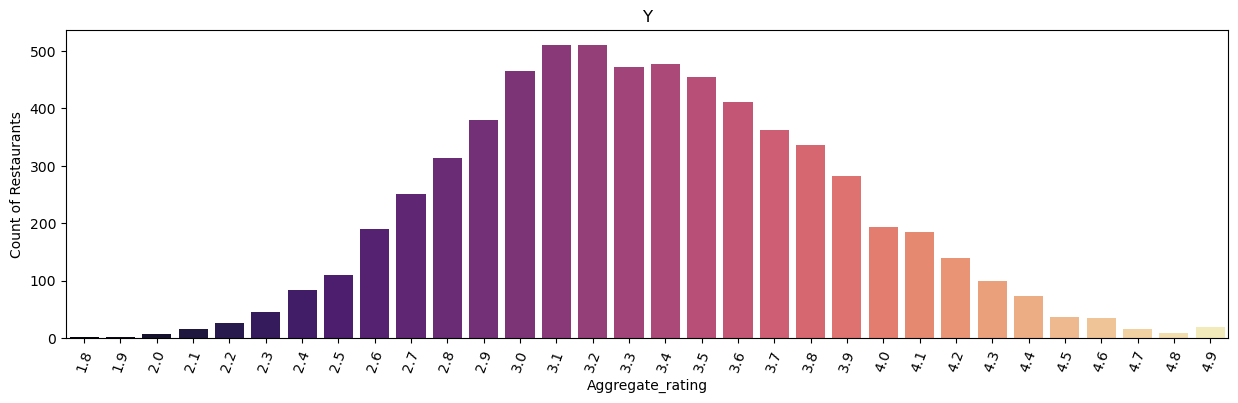

In [89]:
#Plotting the chart
plt.figure(figsize = (15, 4))

sns.countplot(
    x = 'Aggregate_rating',
    data = data[data['Aggregate_rating'] != 0],
    palette = 'magma'
)

plt.xticks(rotation=70)
plt.title('Y')
plt.ylabel('Count of Restaurants')
plt.show();

### Effect of color on Rating

In [94]:
data["Rating_color"].value_counts()

Color_represents = data.groupby(['Rating_color'], as_index = False)['Aggregate_rating'].mean()

Color_represents

,Rating_color,Aggregate_rating
0,Dark Green,4.646552
1,Green,4.153324
2,Orange,3.048722
3,Red,2.296111
4,White,0.000000
5,Yellow,3.677423


In [102]:
Color_represents.columns = ['Rating_color', 'Average_rating']

Color_represents

,Rating_color,Average_rating
0,Dark Green,4.646552
1,Green,4.153324
5,Yellow,3.677423
2,Orange,3.048722
3,Red,2.296111
4,White,0.000000


In [100]:
Color_represents = Color_represents.sort_values(by = 'Average_rating', ascending=False)

Color_represents

,Rating_color,Average_rating
0,Dark Green,4.646552
1,Green,4.153324
5,Yellow,3.677423
2,Orange,3.048722
3,Red,2.296111
4,White,0.000000


In [103]:
Color_represents = Color_represents[0:5]

Color_represents['Rating'] = ['Excellent', 'Very Good', 'Good', 'Okay', 'Poor']

Color_represents

,Rating_color,Average_rating,Rating
0,Dark Green,4.646552,Excellent
1,Green,4.153324,Very Good
5,Yellow,3.677423,Good
2,Orange,3.048722,Okay
3,Red,2.296111,Poor


### Plotting a Bar Chart between Top 5 restaurants vs Count

The bar plot illustrates the count of restaurants in the top five cities, where each bar's height represents the number of restaurants in a particular city. The x-axis displays the city names, and the y-axis represents the count of restaurants in each city.

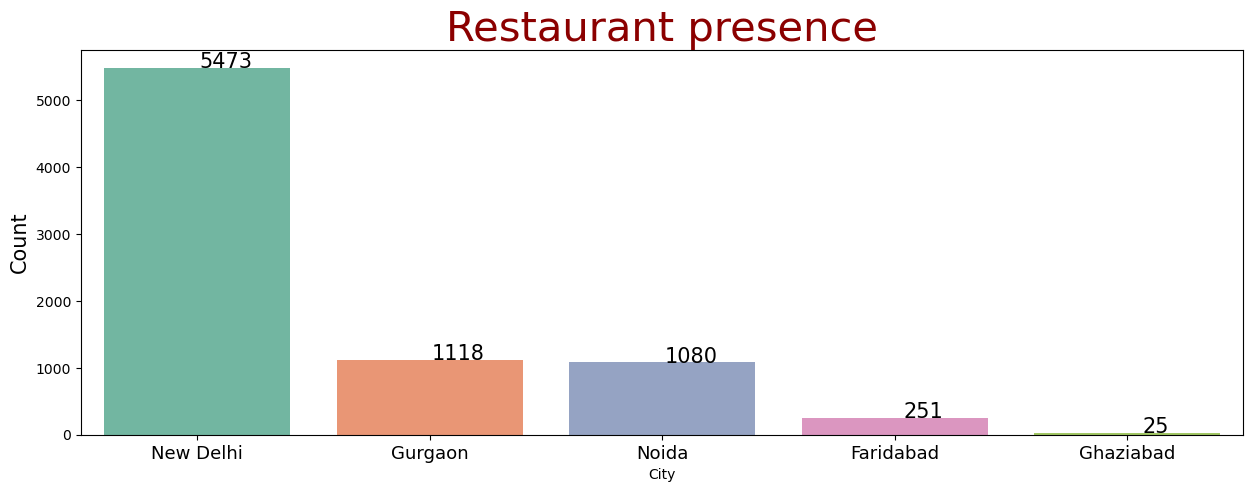

In [114]:
plt.figure(figsize=(15, 5))

vc = data['City'].value_counts()[:5]

g = sns.barplot(
    x = vc.index,
    y = vc.values,
    palette='Set2'
)

for i in range(5):
    value = vc[i]
    g.text(y = value -2, x = i+0.125, s = value, color = 'black', ha = 'center', fontsize=15)

g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_ylabel('Count', fontsize = 15)
g.set_title('Restaurant presence', fontsize = 30, color='darkred')

plt.show()

This visualization offers a quick and engaging way to observe which restaurant names occur most frequently, potentially highlighting popular or commonly encountered restaurant names within the dataset.

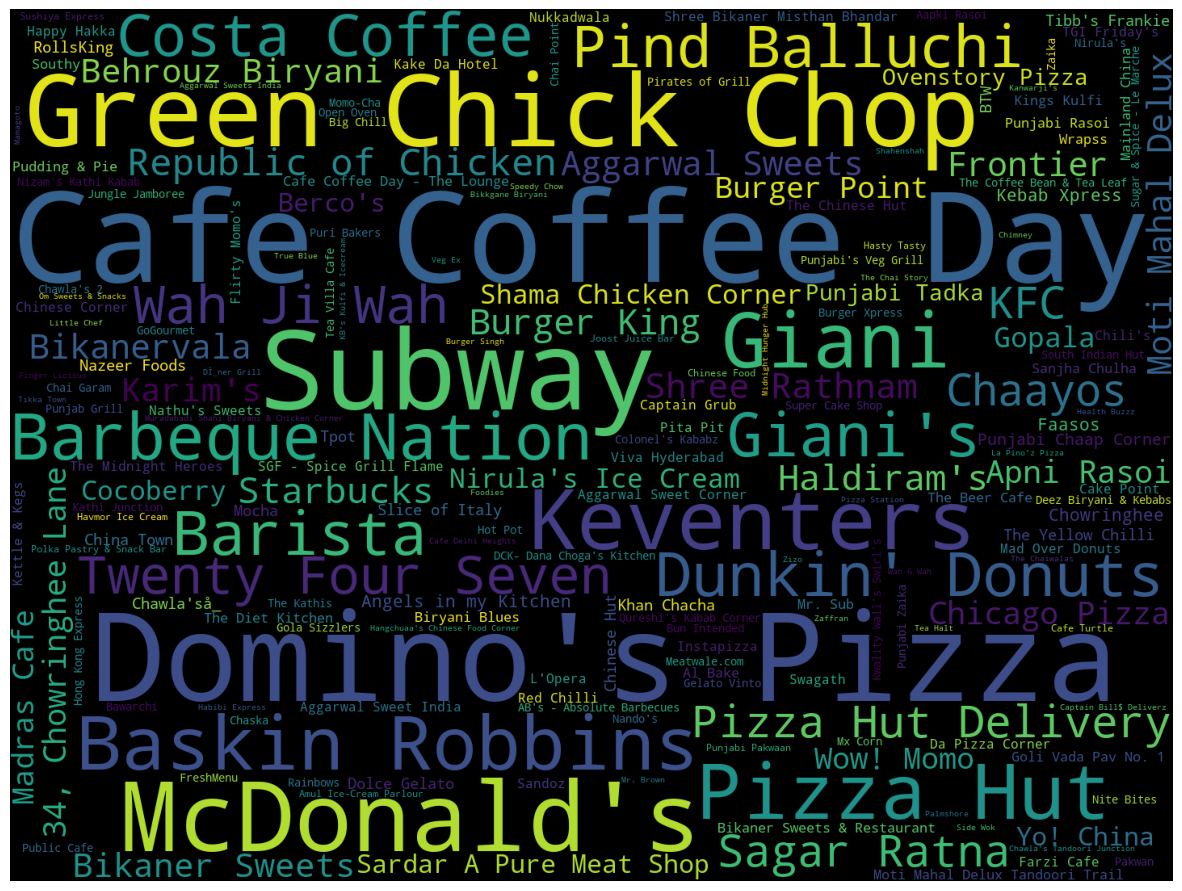

In [116]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = (WordCloud(
    width = 1440, 
    height = 1080, 
    relative_scaling = 0.5,
    stopwords=stopwords).generate_from_frequencies(data['Restaurant_Name'].value_counts())
    )

fig = plt.figure(1, figsize = (15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Horizontal bar plot showcasing the top 10 most frequent restaurant names 

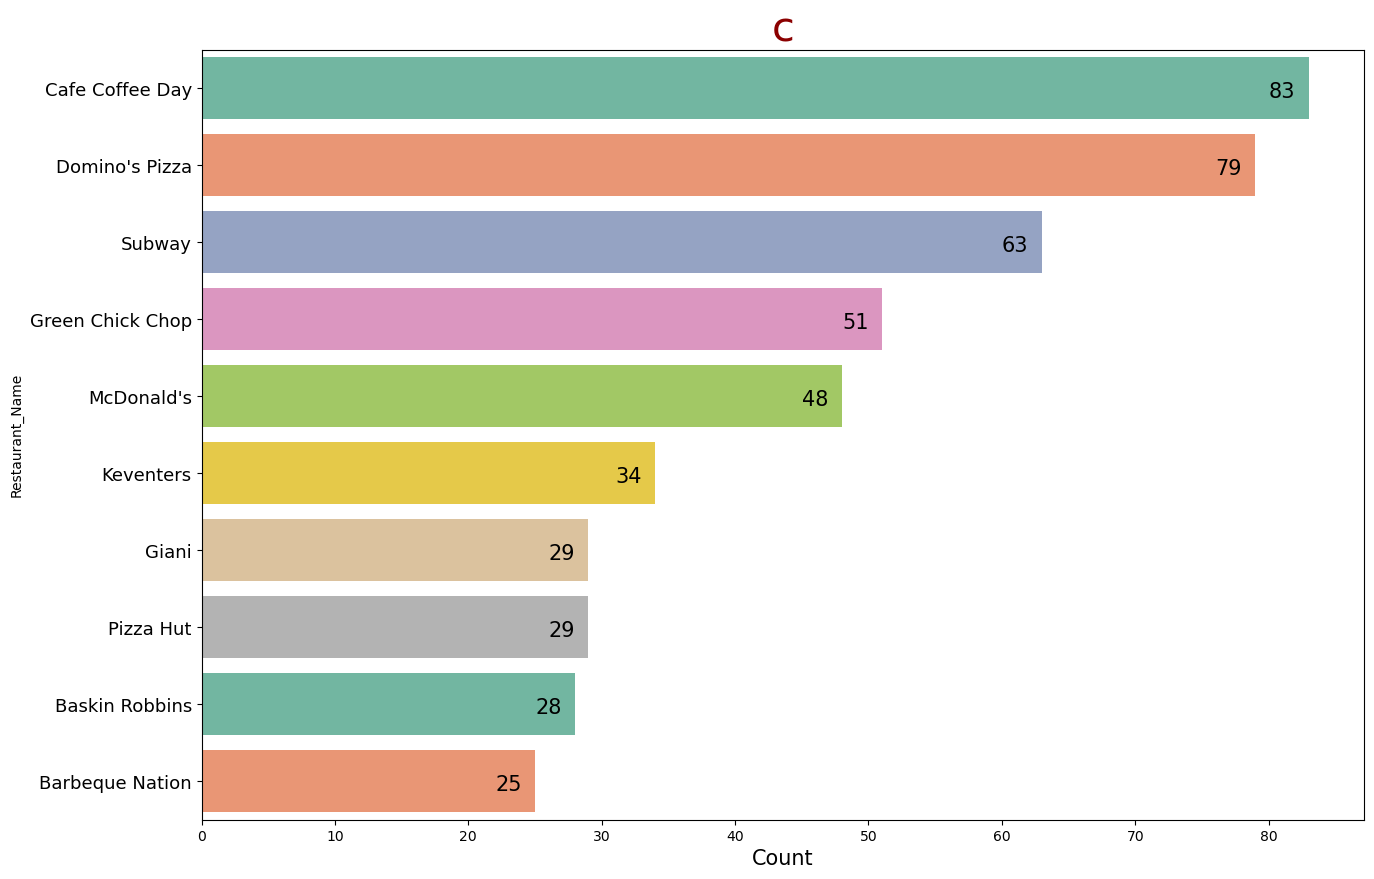

In [117]:
plt.figure(figsize=(15, 10))

vc = data['Restaurant_Name'].value_counts()[:10]

g = sns.barplot(y=vc.index, x=vc.values, palette='Set2')
g.set_yticklabels(g.get_yticklabels(), fontsize=13)

for i in range(10):
    value = vc[i]
    g.text(x=value - 2, y=i + 0.125, s=value, color='black', ha="center", fontsize=15)

g.set_xlabel('Count', fontsize=15)
g.set_title('c', fontsize=30, color='darkred')

plt.show()

### Donut Chart 1: Restaurants that allow table booking vs that do not allow table booking

### Donut Chart 2: Restaurants that provide online delivery vs Restaurants that dont

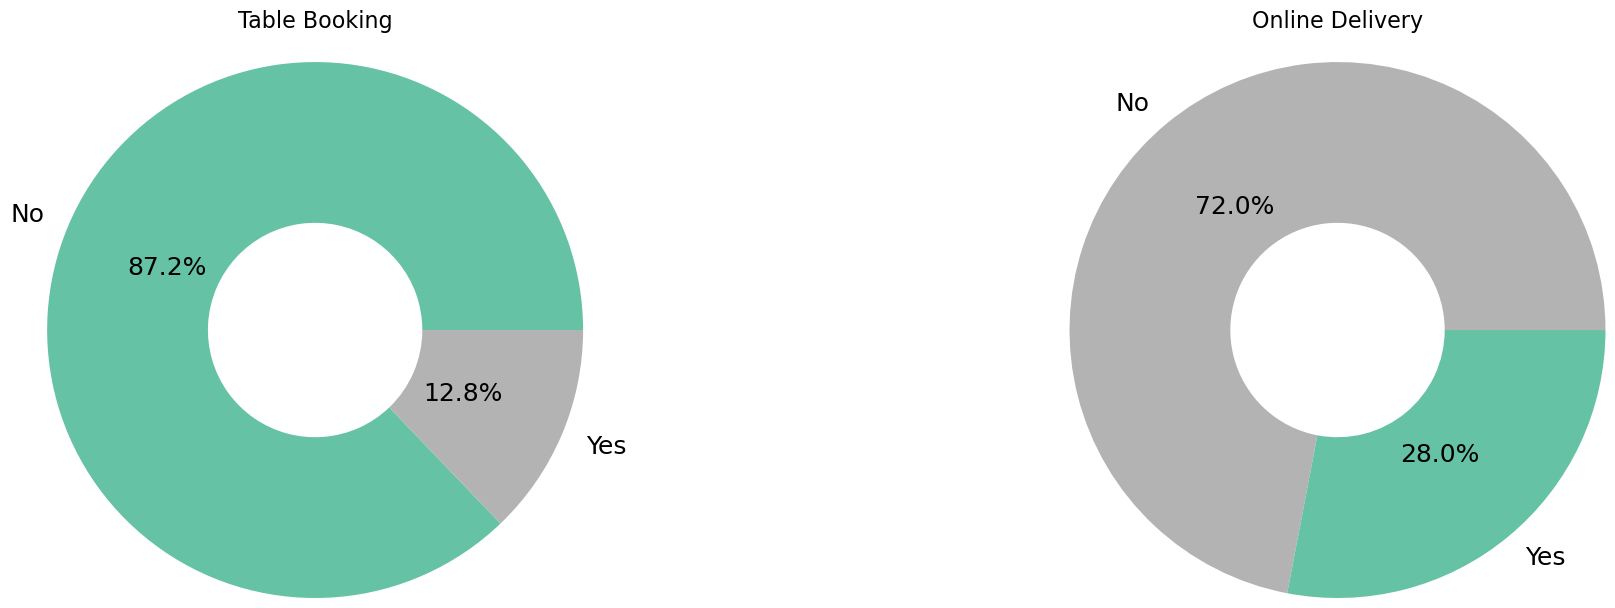

In [120]:
f, axes = plt.subplots(1, 2, figsize=(20, 7))

# Restaurants that allow table booking vs that dont
data['Has_Table_booking'].value_counts().plot.pie(
                                                ax=axes[0], 
                                                autopct='%0.1f%%', 
                                                radius=1.25,
                                                wedgeprops={'width': 0.75}, 
                                                cmap='Set2',
                                                textprops={'size': 18})

axes[0].set_title('Table Booking\n', fontsize=16)
axes[0].set_ylabel('')

#Restaurants that has online delivery vs that dont
data['Has_Online_delivery'].value_counts().plot.pie(
                                                ax=axes[1], 
                                                autopct='%0.1f%%', 
                                                radius=1.25,
                                                wedgeprops={'width': 0.75}, 
                                                cmap='Set2_r',
                                                textprops={'size': 18})

axes[1].set_title('Online Delivery\n', fontsize=16)
axes[1].set_ylabel('')

plt.tight_layout(w_pad=20, h_pad=10, pad=4)
plt.show()

In [121]:
pd.crosstab(data.Has_Online_delivery,data.Has_Table_booking)

Has_Table_booking,No,Yes
Has_Online_delivery,,
No,5545,684
Yes,1996,427


## The set of visualizations aims to offer insights into the relationship between online delivery and table booking services among restaurants in the dataset.

### Venn Diagram (Left):
* Illustrates the overlap and differences between restaurants that offer online delivery and those that provide table booking services.
* The overlapping region represents restaurants that offer both services.
* The unique sections show restaurants that provide only online delivery, only table booking, or neither service.
* Helps understand the distribution and intersection of restaurants based on their service offerings.

### Bar Plot (Right):
* Displays the total number of votes received by different categories of restaurants categorized by their service offerings (Online Delivery and Table Booking).
* The x-axis shows four categories: 'None' (neither service), 'Only Table Booking', 'Only Delivery', and 'Both' services.
* The y-axis represents the total number of votes received by restaurants falling into each category.
* Annotations on the bars display the percentage of votes relative to the total votes in each category.

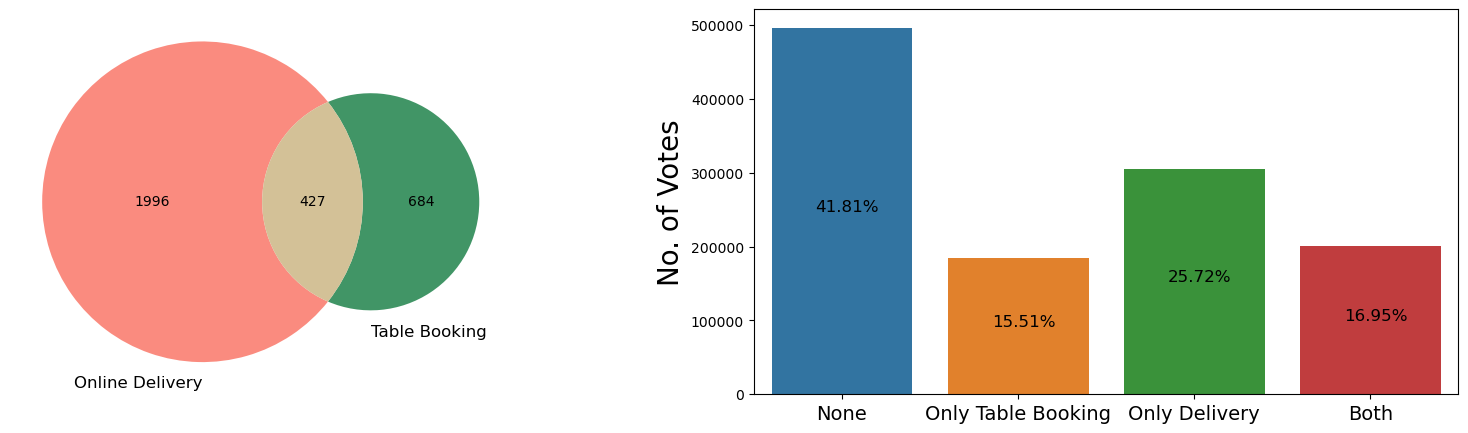

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

s1 = set(data[data['Has_Online_delivery'] == 'Yes']['Restaurant_ID'])
s2 = set(data[data['Has_Table_booking'] == 'Yes']['Restaurant_ID'])
out = venn2(
    [s1, s2], 
    ['Online Delivery', 'Table Booking'], 
    ['salmon', 'seagreen'], 
    alpha = 0.91,
    ax = ax[0]
    )

dc = data.pivot_table(index=['Has_Online_delivery', 'Has_Table_booking'], values='Votes', aggfunc='sum')
dc.index = ['None', 'Only Table Booking', 'Only Delivery', 'Both']
dc['Perc'] = (dc['Votes'] / dc['Votes'].sum() * 100).round(2)

sns.barplot(x=dc.index, y=dc['Votes'], ax=ax[1])
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('')

for i in range(len(dc)):
    plt.annotate(str(dc['Perc'].iloc[i]) + '%', xy=(i - 0.15, int(dc['Votes'].iloc[i] / 2)), fontsize=12)

plt.ylabel('No. of Votes', fontsize=20)
plt.show()

In [127]:
dc

,Votes,Perc
None,496366,41.81
Only Table Booking,184183,15.51
Only Delivery,305369,25.72
Both,201245,16.95


The crossplot representation helps to compare the presence or absence of online delivery services across different aggregate rating levels. It indicates the distribution of restaurants with respect to their aggregate ratings and their online delivery availability.

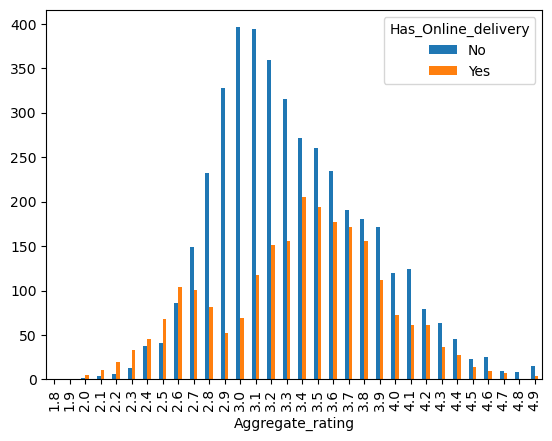

In [129]:
d = data[data.Aggregate_rating != 0]
pd.crosstab(d.Aggregate_rating, d.Has_Online_delivery).plot.bar();

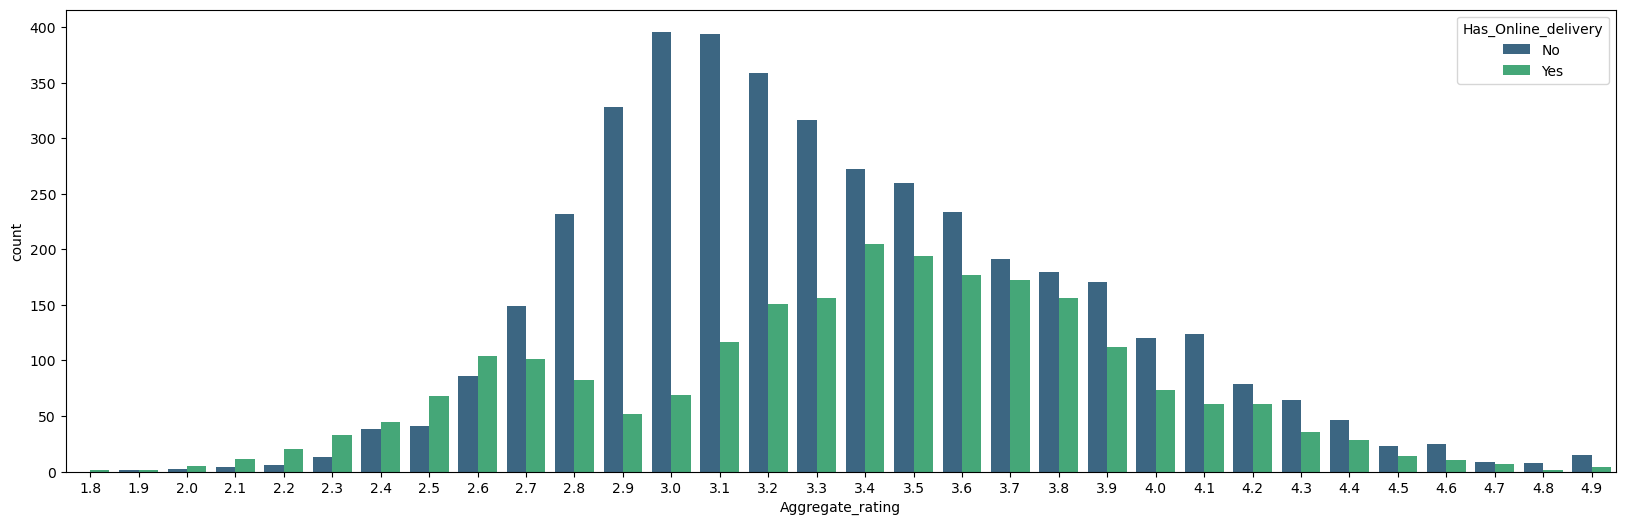

In [131]:
plt.figure(figsize=(20,6))

sns.countplot(
    data=data[data.Aggregate_rating !=0],
    x='Aggregate_rating',
    hue='Has_Online_delivery',
    palette='viridis')

plt.show()

### Restaurants across city

In [133]:
top10 = data.City.value_counts()[:10]

top10[:2]

City
New Delhi    5473
Gurgaon      1118
Name: count, dtype: int64

### Top 10 Cuisines served across the city

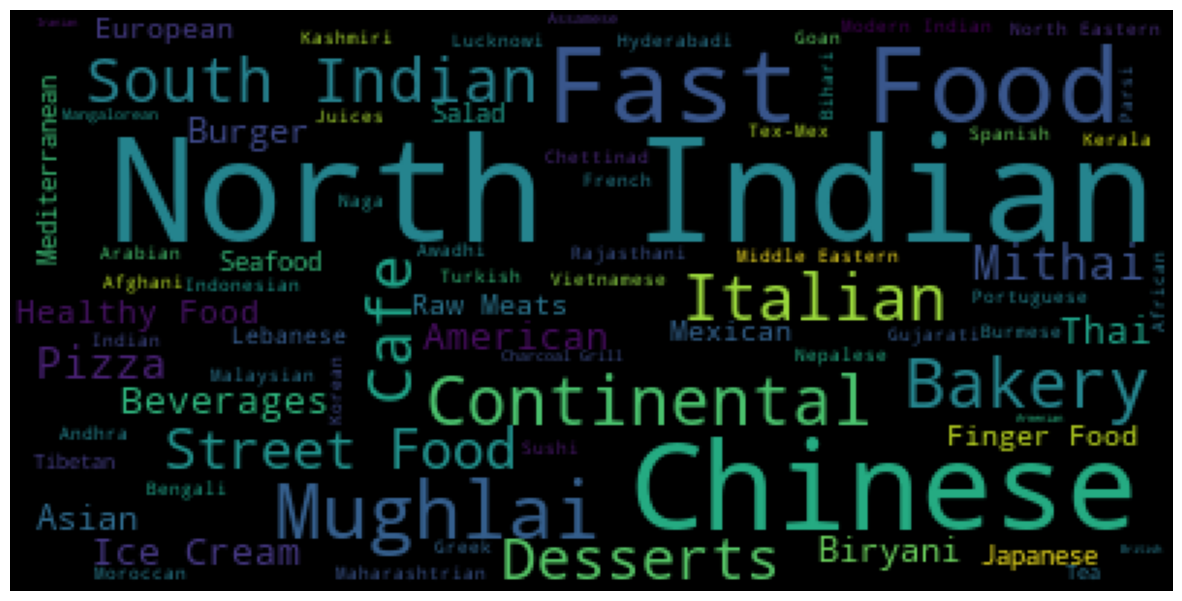

In [134]:
l = []

for i in data['Cuisines'].str.split(','):
    l.extend(i)

s = pd.Series([i.strip() for i in l])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords).generate_from_frequencies(s.value_counts())

fig = plt.figure(1, figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Visualization of Top 10 Cuisines

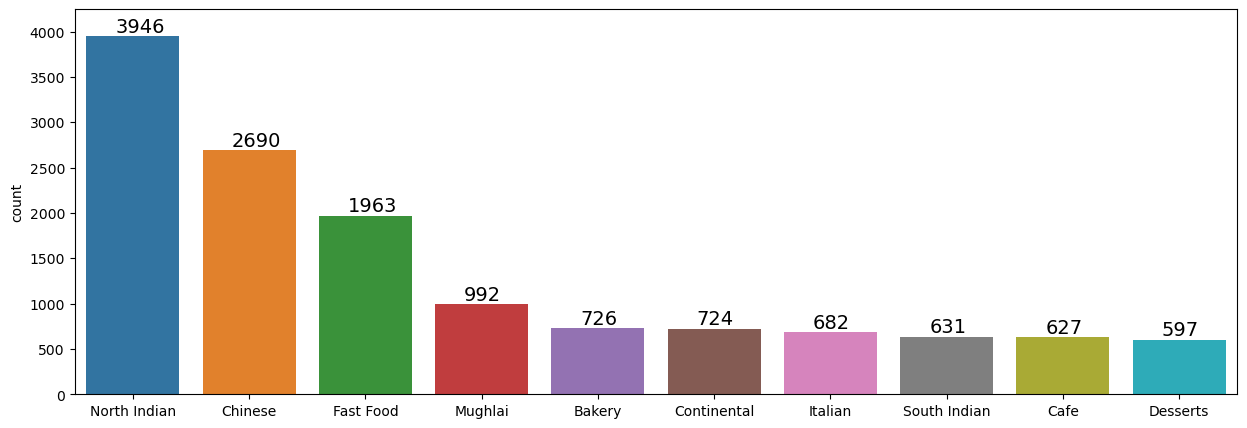

In [135]:
plt.figure(figsize=(15, 5))

sns.barplot(
    x=s.value_counts()[:10].index, 
    y=s.value_counts()[:10])

for i in range(10):
    plt.annotate(s.value_counts()[i], 
                 xy=(i - 0.15, 
                     s.value_counts()[i] + 50), 
                     fontsize=14)

plt.ylim(0, round(s.value_counts()[0] + 300))

plt.show()

In [137]:
data['no_cuisines'] = data.Cuisines.str.split(',').apply(len)

### This Bar chart visualizes the distribution of restaurants based on the number of cuisines they offer.

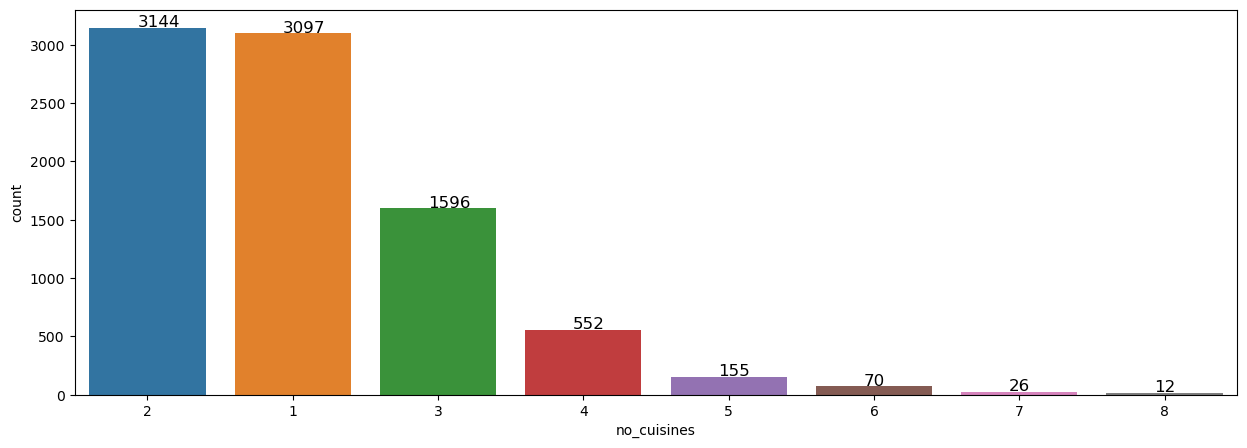

In [138]:
plt.figure(figsize=(15, 5))
vc = data['no_cuisines'].value_counts() 
sns.countplot(x='no_cuisines', data=data, order=vc.index)

for i in range(len(vc)):
    plt.annotate(vc.iloc[i], xy=(i - 0.07, vc.iloc[i] + 10), fontsize=12)

plt.show()

### No. of cuisines vs rating

In [139]:
 data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country', 'Rating_cat',
       'no_cuisines'],
      dtype='object')

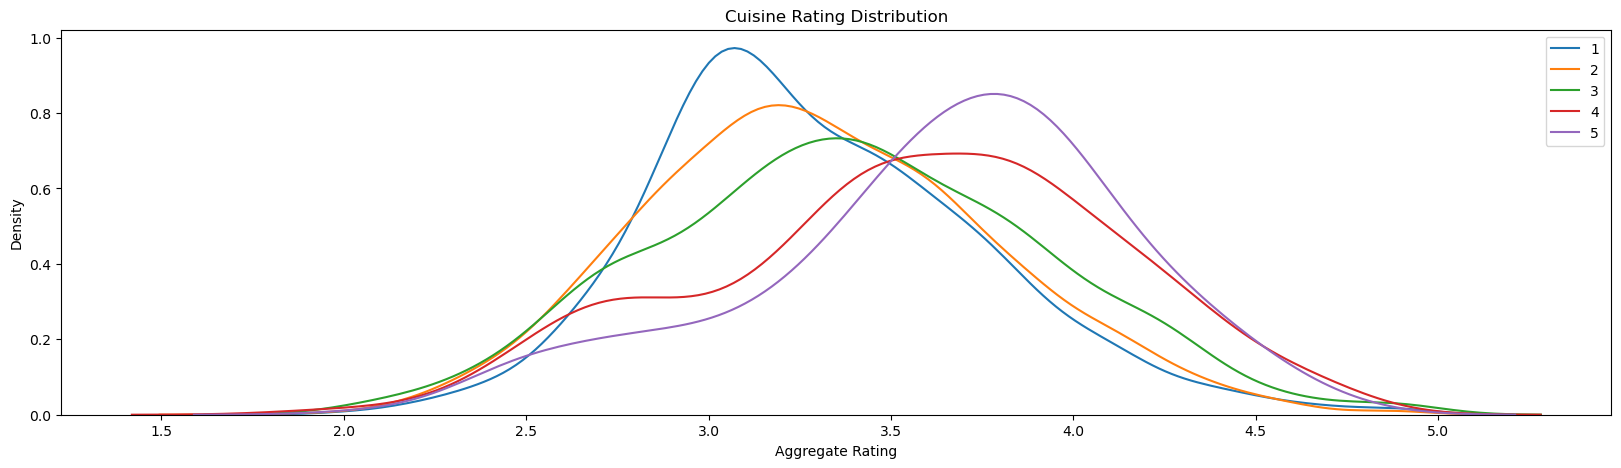

In [140]:
plt.figure(figsize=(20, 5))

fusion_rate = data.loc[data['Aggregate_rating'] > 0, ['no_cuisines', 'Aggregate_rating']].copy()
fusion_rate.loc[fusion_rate['no_cuisines'] > 5, 'no_cuisines'] = 5
fusion_rate = fusion_rate.loc[fusion_rate['Aggregate_rating'] != -1, :]

pal = sns.color_palette('Oranges', 11)

for i in range(1, 6):
    num_ix = fusion_rate['no_cuisines'] == i
    sns.distplot(fusion_rate.loc[num_ix, 'Aggregate_rating'], label=str(i), hist=False)

plt.legend()
plt.title('Cuisine Rating Distribution')
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.show()

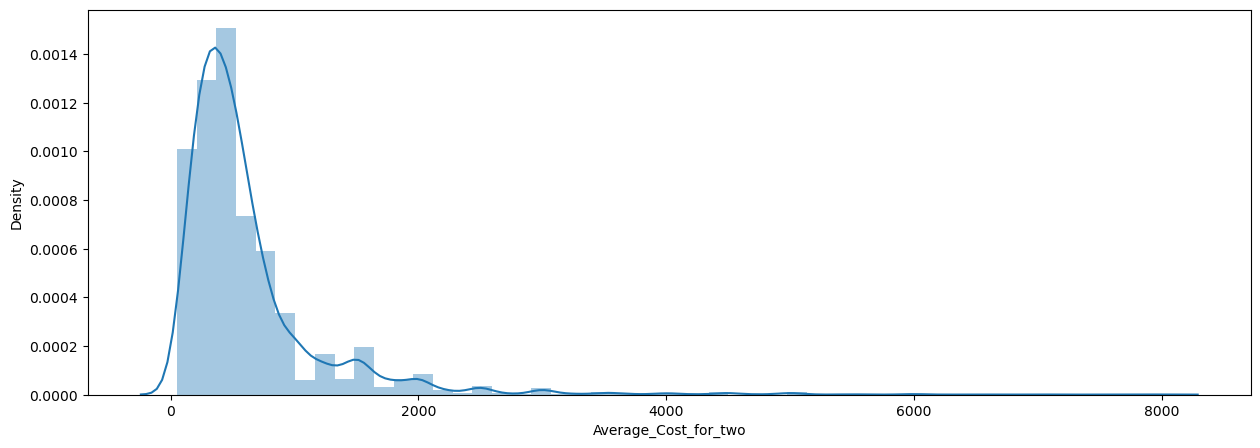

In [141]:
plt.figure(figsize = (15,5))

sns.distplot(
    data[data.Average_Cost_for_two != 0].Average_Cost_for_two)

plt.show()

### Factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option etc.

In [142]:
data['Average_Cost_for_two_cat']= pd.cut(data[data.Average_Cost_for_two != 0].Average_Cost_for_two,
       bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000],
                                         
labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'no␣ ,→limit'])

In [145]:
# Check the existence of columns and their values
print(data.columns)  # Check if 'Average_Cost_for_two_cat' and 'Price_range' are present

# Print unique values in 'Average_Cost_for_two_cat' and 'Price_range' columns
print(data['Average_Cost_for_two_cat'].unique())
print(data['Price_range'].unique())

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country', 'Rating_cat',
       'no_cuisines', 'Average_Cost_for_two_cat'],
      dtype='object')
['<=10000', '<=5000', '<=3000', '<=1000', '<=500', '<=200', NaN]
Categories (7, object): ['<=200' < '<=500' < '<=1000' < '<=3000' < '<=5000' < '<=10000' < 'no␣ ,→limit']
[4 3 2 1]


In [147]:
# Convert 'Average_Cost_for_two_cat' to a string-based column temporarily
data['Average_Cost_for_two_cat'] = data['Average_Cost_for_two_cat'].astype(str)

# Replace 'NaN' values with a valid category or 'Other'
data['Average_Cost_for_two_cat'].replace('nan', 'Other', inplace=True)

# Convert 'Average_Cost_for_two_cat' back to categorical type
data['Average_Cost_for_two_cat'] = data['Average_Cost_for_two_cat'].astype('category')

# Remove any rows containing unexpected values like 'no limit'
data = data[~data['Average_Cost_for_two_cat'].isin(['no limit'])]

# Recheck unique values after modifications
print(data['Average_Cost_for_two_cat'].unique())

# Now, try running the plotting code after ensuring the column has only valid categories.
# Use the previous plotting code after making sure the data is clean and ready for visualization.


['<=10000', '<=5000', '<=3000', '<=1000', '<=500', '<=200', 'Other']
Categories (7, object): ['<=1000', '<=10000', '<=200', '<=3000', '<=500', '<=5000', 'Other']


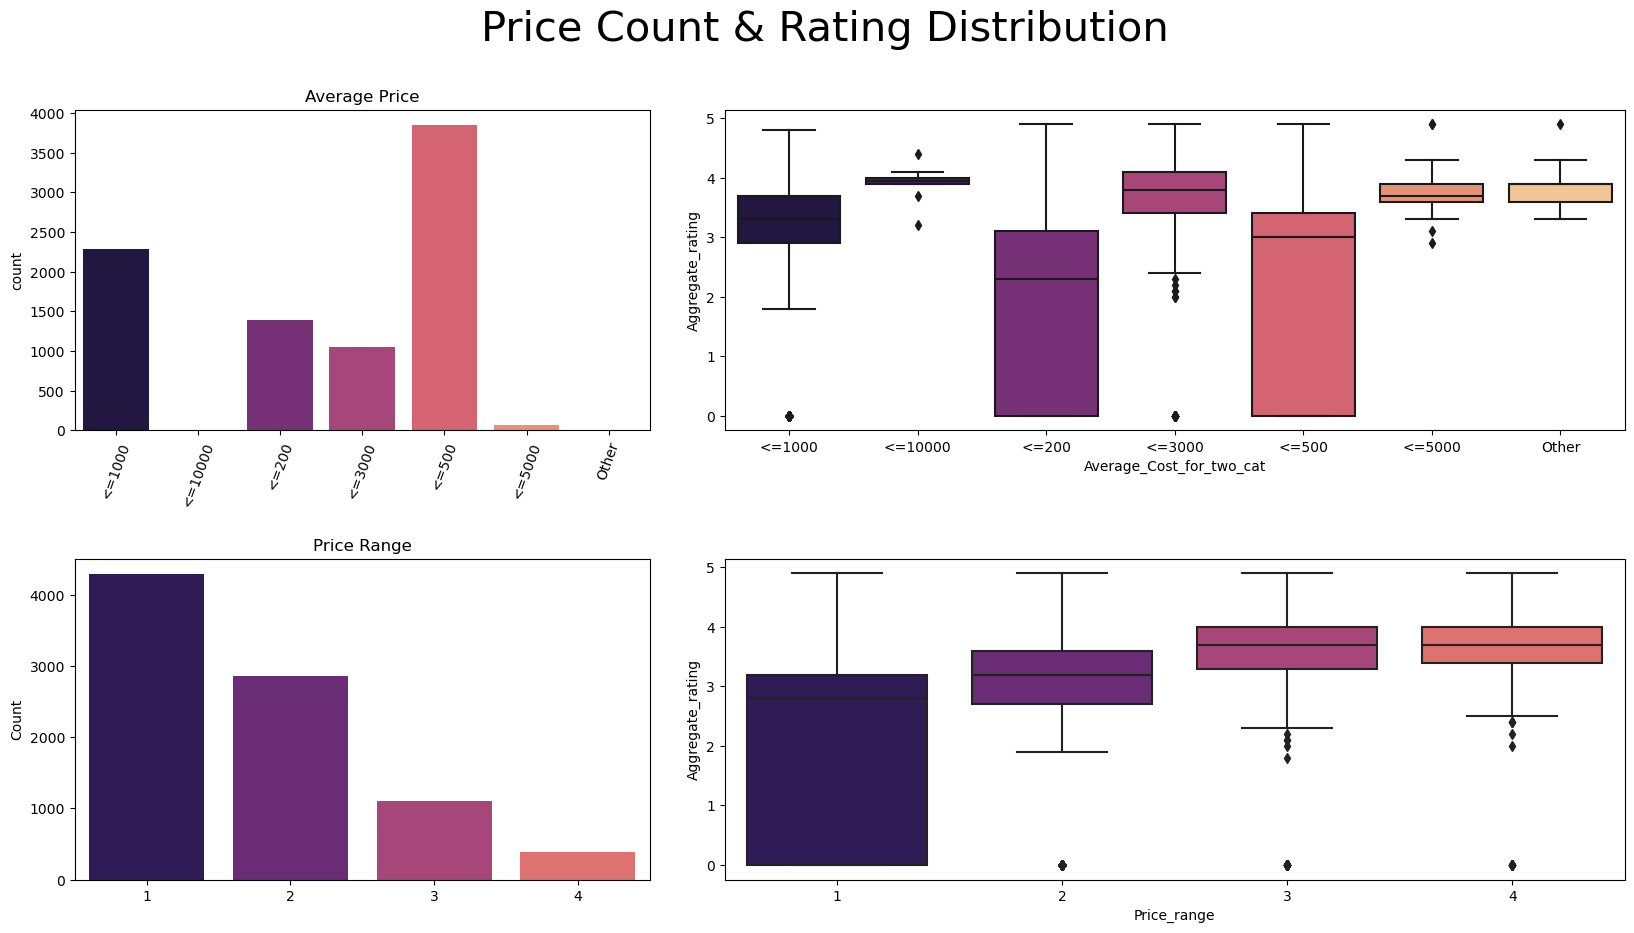

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(20, 10))

# First subplot: Count plot for 'Average_Cost_for_two_cat'
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=2)
sns.countplot(x='Average_Cost_for_two_cat', data=data, ax=ax1, palette=sns.color_palette('magma', 7))
ax1.set_title('Average Price')
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=70)

# Second subplot: Boxplot for 'Aggregate_rating' vs 'Average_Cost_for_two_cat'
ax2 = plt.subplot2grid((2, 5), (0, 2), colspan=3)
sns.boxplot(x='Average_Cost_for_two_cat', y='Aggregate_rating', data=data, ax=ax2, palette=sns.color_palette('magma', 7))

# Calculate count for 'Price_range'
count = data['Price_range'].value_counts().reset_index()
count.columns = ['Price_range', 'Count']

# Third subplot: Bar plot for count of 'Price_range'
ax3 = plt.subplot2grid((2, 5), (1, 0), colspan=2)
sns.barplot(x='Price_range', y='Count', data=count, ax=ax3, palette=sns.color_palette('magma', 5))
ax3.set_title('Price Range')
ax3.set_xlabel('')

# Fourth subplot: Boxplot for 'Aggregate_rating' vs 'Price_range'
ax4 = plt.subplot2grid((2, 5), (1, 2), colspan=3)
sns.boxplot(x='Price_range', y='Aggregate_rating', data=data, ax=ax4, palette=sns.color_palette('magma', 5))

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.suptitle('Price Count & Rating Distribution', size=30)
plt.show()


### Aggregate Rating vs Vote

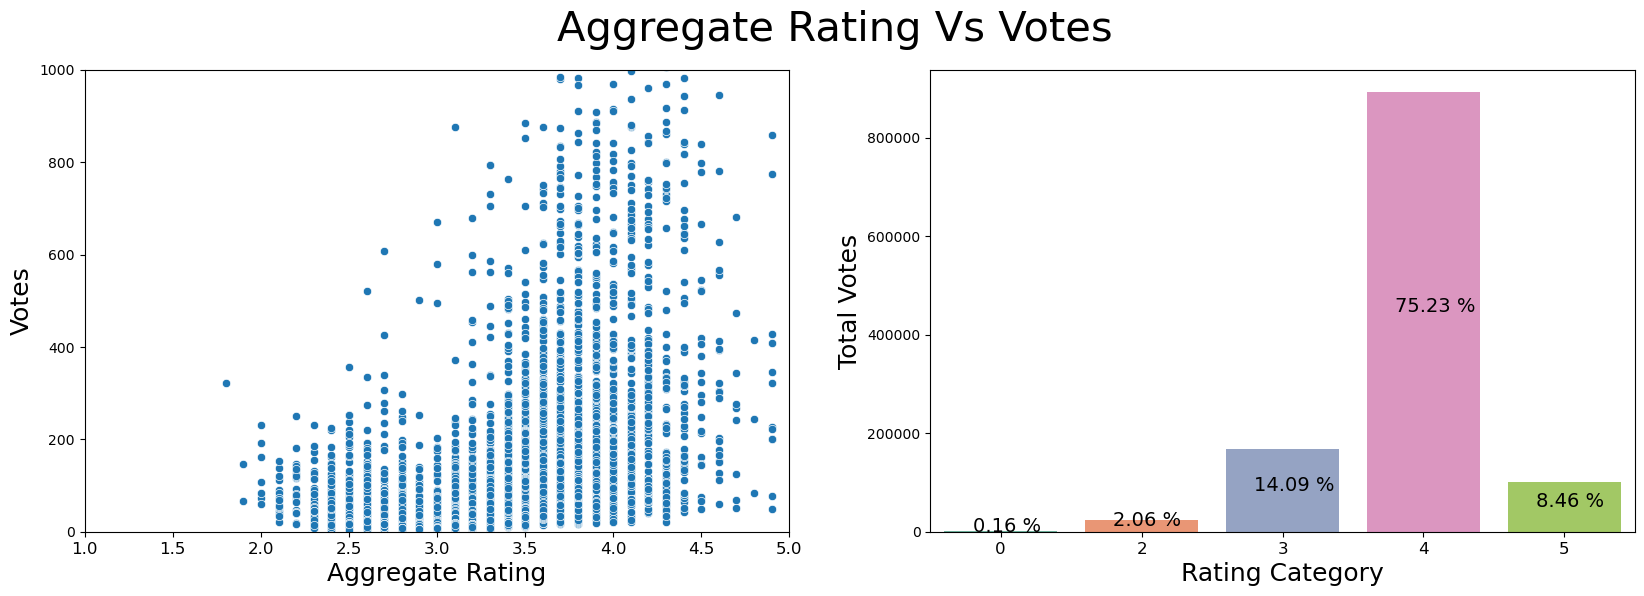

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 6))

# Scatter plot for 'Aggregate_rating' vs 'Votes'
sns.scatterplot(data=data, x='Aggregate_rating', y='Votes', ax=ax[0], palette='Set2')
ax[0].set_ylim(0, 1000)
ax[0].set_xlim(1, 5)
ax[0].set_ylabel('Votes', fontsize=18)
ax[0].set_xlabel('Aggregate Rating', fontsize=18)
ax[0].set_xticklabels(ax[0].get_xticks(), fontsize=12)

# Bar plot for total votes in each 'Rating_cat'
agg = data.pivot_table(index='Rating_cat', values='Votes', aggfunc='sum').reset_index()
agg['Perc_votes'] = (agg['Votes'] / agg['Votes'].sum() * 100).round(2)

sns.barplot(x='Rating_cat', y='Votes', data=agg, ax=ax[1], palette='Set2')
for i in range(len(agg)):
    ax[1].annotate(str(agg['Perc_votes'][i]) + ' %', xy=(i - 0.2, int(agg['Votes'][i] / 2)),
                   fontsize=14, fontweight='medium')

ax[1].set_ylabel('Total Votes', fontsize=18)
ax[1].set_xlabel('Rating Category', fontsize=18)
ax[1].set_xticklabels(agg['Rating_cat'], fontsize=12)

plt.suptitle('Aggregate Rating Vs Votes', size=30)
plt.show()
